In [1]:
import pandas as pd
import numpy as np
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12),index=index1)
df_obj=ser_obj.unstack(0)
print(df_obj)
print('-'*50)

#计算最小值有空值如何处理
df_obj.loc[0,'b']=np.nan
print(df_obj)
print('-'*50)

print(df_obj.min(axis=0, skipna=True))

cloth         a         b         c         d
size                                         
0     -1.748599  0.347039 -0.486556  0.035840
1      0.850752  0.885648  0.802929 -1.246225
2      0.645020  0.418125  0.022085 -1.335764
--------------------------------------------------
cloth         a         b         c         d
size                                         
0     -1.748599       NaN -0.486556  0.035840
1      0.850752  0.885648  0.802929 -1.246225
2      0.645020  0.418125  0.022085 -1.335764
--------------------------------------------------
cloth
a   -1.748599
b    0.418125
c   -0.486556
d   -1.335764
dtype: float64


In [2]:
print(df_obj.describe())

cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean  -0.084276  0.651887  0.112820 -0.848717
std    1.445012  0.330588  0.649513  0.767356
min   -1.748599  0.418125 -0.486556 -1.335764
25%   -0.551789  0.535006 -0.232235 -1.290995
50%    0.645020  0.651887  0.022085 -1.246225
75%    0.747886  0.768767  0.412507 -0.605193
max    0.850752  0.885648  0.802929  0.035840


In [19]:
print(df_obj.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3 non-null      float64
 1   b       2 non-null      float64
 2   c       3 non-null      float64
 3   d       3 non-null      float64
dtypes: float64(4)
memory usage: 228.0 bytes
None


In [3]:
df_obj.loc[:,'c']

size
0   -0.486556
1    0.802929
2    0.022085
Name: c, dtype: float64

In [4]:
#计算最小值或者最大值的索引的位置
print(df_obj.loc[:,'c'].argmin())#argmin和argmax只能是series，不能是df

0


In [5]:
df_obj

cloth         a         b         c         d
size                                         
0     -1.748599       NaN -0.486556  0.035840
1      0.850752  0.885648  0.802929 -1.246225
2      0.645020  0.418125  0.022085 -1.335764

In [6]:
#返回的是一个series
#计算最小值或者最大值的索引值
df_obj.idxmin(axis=0, skipna=True)

cloth
a    0
b    2
c    0
d    2
dtype: int64

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) #不加路径默认当前路径
# 打印数据信息
print(df.info()) #查看数据的信息
print('-'*50)

print(df.head()) #查看数值类型的数据的信息
print('-'*50)

df.describe() # 查看 能计算的特征 的统计信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
--------------------------------------------------
   Rank                    Title                     Genre  \
0     1  Guardians of the G

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          872.000000  936.000000  
mean            82.956376   58.985043  
std            103.253540   17.194757  
min              0.000000   11.000000  
25%             13.270000   47.000000  
50%             47.985000   59.500000  
75%            113.715000   72.000000  
max            936.630000  100.000000

In [8]:
#这1000部电影有多少导演和演员
# # 获取平均评分
# print(df["Rating"].mean())
print('-'*50)
# 导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique())) #推荐这种方式

--------------------------------------------------
644
644


In [9]:
# # 获取演员的人数 #二维列表
temp_actors_list = df["Actors"].str.split(", ").tolist()
# print(temp_actors_list)
actors_list = [i for j in temp_actors_list for i in j]  #二维展为一维
actors_num = len(set(actors_list)) #set去重
print(actors_num) #演员的数量

2015


In [10]:
#想知道每个演员出演的电影数量
u,indices = np.unique(actors_list,return_counts = True)
print(u)
indices

['50 Cent' 'A.C. Peterson' 'AJ Michalka' ... 'Émilie Leclerc'
 'Ólafur Darri Ólafsson' 'Óscar Jaenada']


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

###  现在要拍一部电影，从时长、评分、题材三个角度来考虑
### 8.3.1 电影时长

66 191
125
--------------------------------------------------


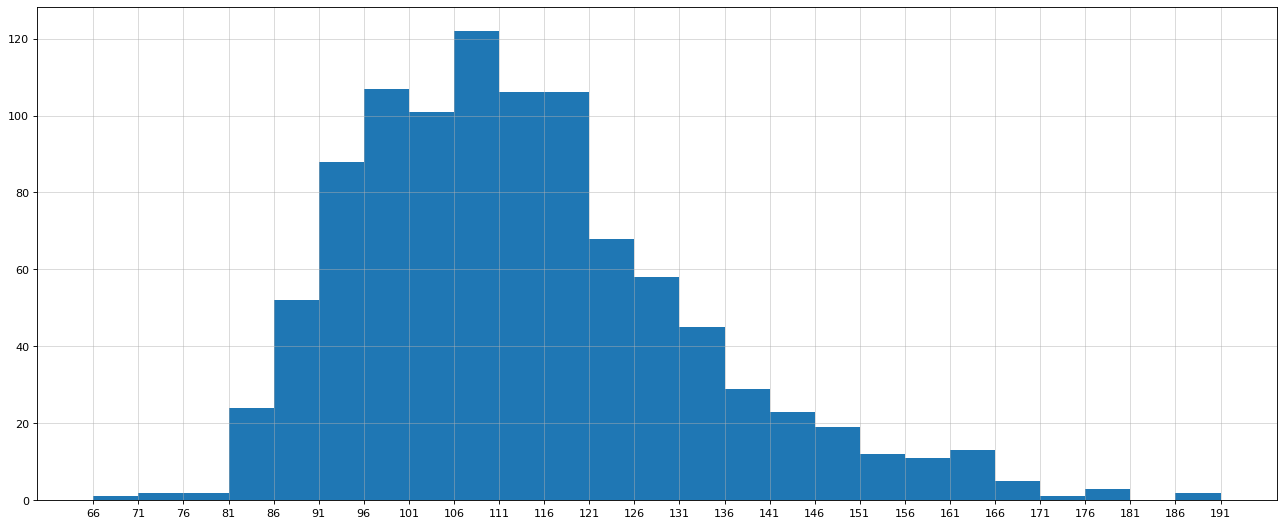

In [11]:
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print(min_runtime,max_runtime)
# 计算组数
print(max_runtime - min_runtime)
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5) #alpha是透明度
#range第三个参数是步长
plt.xticks(range(min_runtime, max_runtime + 5,5))

plt.show()

In [12]:
#电影评分的分布情况
# 获取平均评分
print(df["Rating"].mean())

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Rating"].values  # 从Series中取出数据，得到一个ndarray

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print('-'*50)
print(max_runtime,min_runtime) #最大值最小值电影评分

6.723199999999999
--------------------------------------------------
9.0 1.9


最大评分减去最小评分为7.1
组数为14.0
--------------------------------------------------


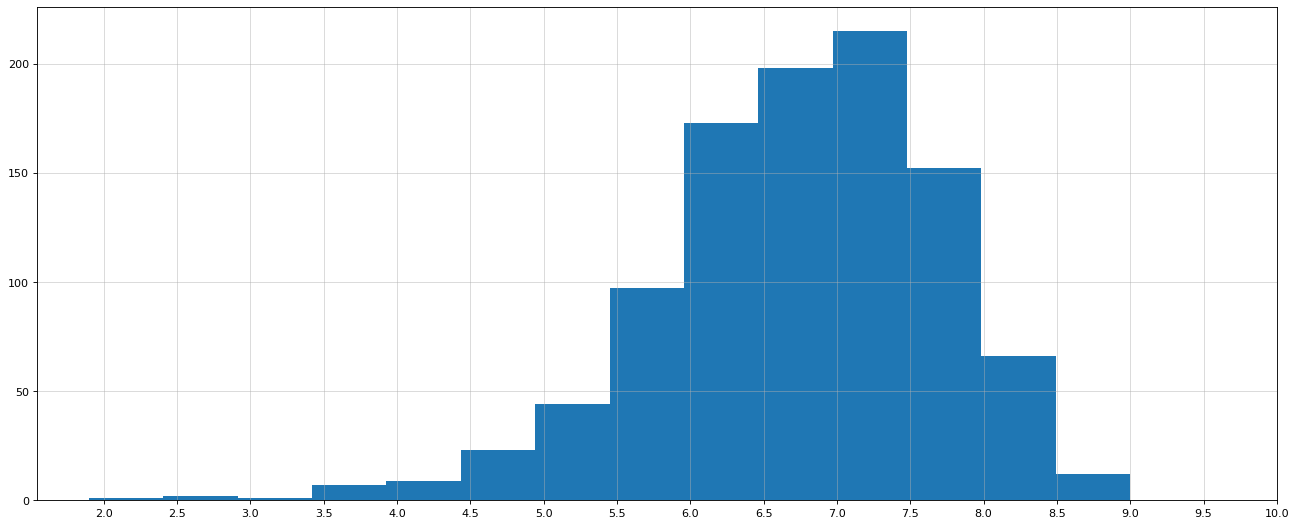

In [13]:
# 计算组数
print(f'最大评分减去最小评分为{max_runtime - min_runtime}')
num_bin = (max_runtime - min_runtime) // 0.5
print(f'组数为{num_bin}')
print("-"*50)

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5)
#因为range的步长不支持0.5,自己做一个列表
_x = [min_runtime+0.1]
i = min_runtime+0.1
while i <= max_runtime + 0.5:
    i = i + 0.5
    _x.append(i)

plt.xticks(_x) #设置x轴的刻度

plt.show()

### 8.3.3 导演要拍什么题材电影

In [14]:
print(df["Genre"].head(3))  #看前几条数据，掌握格式，内容类型

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: object


In [15]:
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # 得到二维列表，[[],[],[]]
#print(temp_list)

# 二维变为一维
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list)) # 20种题材类型

# 构造全为0的数组，行是原来的样本数，列是题材类型数目，one-hot编码，
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df.head(3))

20
   Mystery  War  Sci-Fi  Comedy  Musical  Crime  Romance  Biography  Horror  \
0      0.0  0.0     0.0     0.0      0.0    0.0      0.0        0.0     0.0   
1      0.0  0.0     0.0     0.0      0.0    0.0      0.0        0.0     0.0   
2      0.0  0.0     0.0     0.0      0.0    0.0      0.0        0.0     0.0   

   Family  Drama  Animation  Sport  Fantasy  Thriller  Western  Adventure  \
0     0.0    0.0        0.0    0.0      0.0       0.0      0.0        0.0   
1     0.0    0.0        0.0    0.0      0.0       0.0      0.0        0.0   
2     0.0    0.0        0.0    0.0      0.0       0.0      0.0        0.0   

   Music  History  Action  
0    0.0      0.0     0.0  
1    0.0      0.0     0.0  
2    0.0      0.0     0.0  


In [16]:
# 给每个电影出现分类的位置赋值1,one-hot的中文是独热码
for i in range(df.shape[0]):
    zeros_df.loc[i, temp_list[i]] = 1 #temp_list是二维列表，temp_list[i]是一个一维列表，表示第i个电影的题材
    # 比如zeros_df.loc[0,["Sci-fi","Mucical"]] = 1，会把这个电影拥有的题材标记为1

zeros_df.head(5)

Mystery  War  Sci-Fi  Comedy  Musical  Crime  Romance  Biography  Horror  \
0      0.0  0.0     1.0     0.0      0.0    0.0      0.0        0.0     0.0   
1      1.0  0.0     1.0     0.0      0.0    0.0      0.0        0.0     0.0   
2      0.0  0.0     0.0     0.0      0.0    0.0      0.0        0.0     1.0   
3      0.0  0.0     0.0     1.0      0.0    0.0      0.0        0.0     0.0   
4      0.0  0.0     0.0     0.0      0.0    0.0      0.0        0.0     0.0   

   Family  Drama  Animation  Sport  Fantasy  Thriller  Western  Adventure  \
0     0.0    0.0        0.0    0.0      0.0       0.0      0.0        1.0   
1     0.0    0.0        0.0    0.0      0.0       0.0      0.0        1.0   
2     0.0    0.0        0.0    0.0      0.0       1.0      0.0        0.0   
3     1.0    0.0        1.0    0.0      0.0       0.0      0.0        0.0   
4     0.0    0.0        0.0    0.0      1.0       0.0      0.0        1.0   

   Music  History  Action  
0    0.0      0.0     1.0  
1    0.0      0.0     0.0  
2    0.0      0.0     0.0  
3    0.0      0.0     0.0  
4    0.0      0.0     1.0

In [17]:
# 将上面的位图沿0轴相加，可达得到每个分类有多少电影
# sum会让df变为Series
genre_count = zeros_df.sum(axis=0)
print(genre_count)
# print(zeros_df.sum(axis=1)) #每部电影的题材数量

Mystery      106.0
War           13.0
Sci-Fi       120.0
Comedy       279.0
Musical        5.0
Crime        150.0
Romance      141.0
Biography     81.0
Horror       119.0
Family        51.0
Drama        513.0
Animation     49.0
Sport         18.0
Fantasy      101.0
Thriller     195.0
Western        7.0
Adventure    259.0
Music         16.0
History       29.0
Action       303.0
dtype: float64


Musical        5.0
Western        7.0
War           13.0
Music         16.0
Sport         18.0
History       29.0
Animation     49.0
Family        51.0
Biography     81.0
Fantasy      101.0
Mystery      106.0
Horror       119.0
Sci-Fi       120.0
Romance      141.0
Crime        150.0
Thriller     195.0
Adventure    259.0
Comedy       279.0
Action       303.0
Drama        513.0
dtype: float64
--------------------------------------------------
Index(['Musical', 'Western', 'War', 'Music', 'Sport', 'History', 'Animation',
       'Family', 'Biography', 'Fantasy', 'Mystery', 'Horror', 'Sci-Fi',
       'Romance', 'Crime', 'Thriller', 'Adventure', 'Comedy', 'Action',
       'Drama'],
      dtype='object')
--------------------------------------------------
[  5.   7.  13.  16.  18.  29.  49.  51.  81. 101. 106. 119. 120. 141.
 150. 195. 259. 279. 303. 513.]
--------------------------------------------------


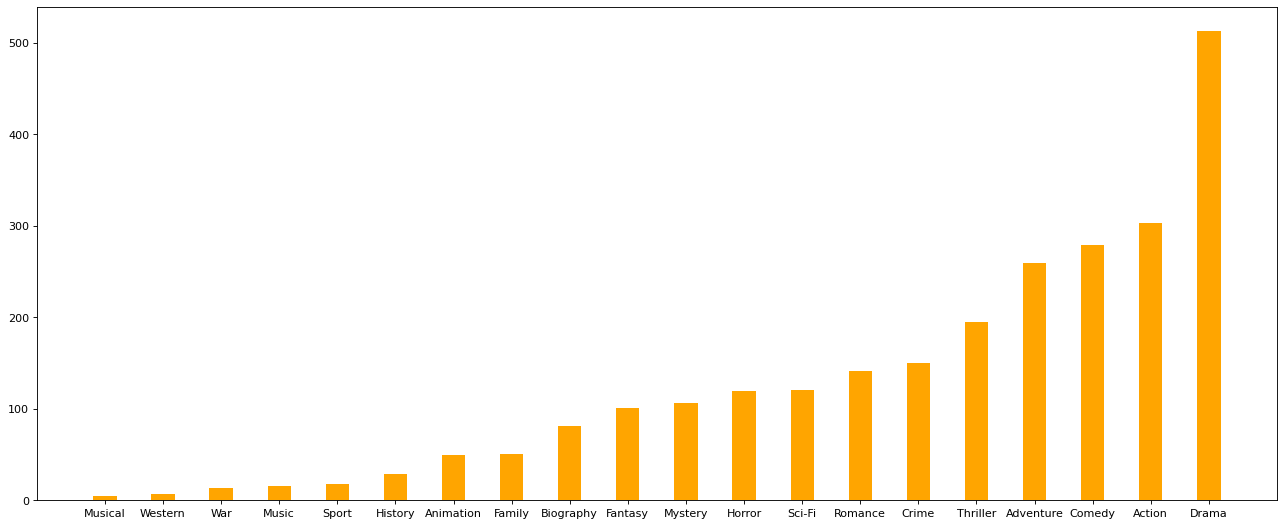

In [18]:
# 排序
genre_count = genre_count.sort_values()
print(genre_count)
print('-'*50)

_x = genre_count.index  # 取出Series的索引，即题材名称，作为X轴坐标
print(_x)
print('-'*50)

_y = genre_count.values # 取出Series的值，即各题材数量（已从小到大排好），作为Y轴坐标
print(_y)
print('-'*50)

# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
plt.xticks(range(len(_x)), _x)
plt.show()